<Axes: xlabel='bmi_category', ylabel='waga'>

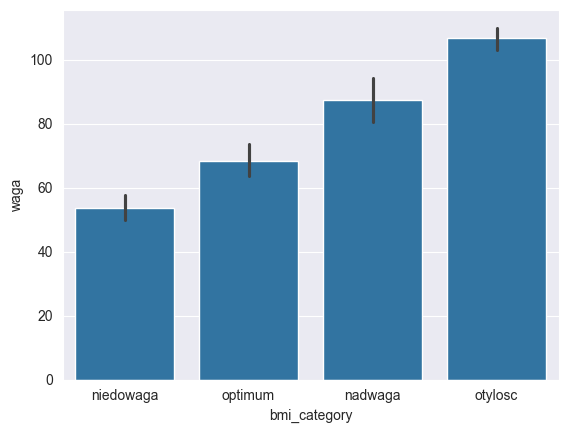

In [1]:
import pandas as pd
import seaborn as sns

# Step 1: Prompt the user for the file path
file_path = input("Wpisz ścieżkę pliku (musi miec tabulatory jako przerwy): ")

# Step 2: Load the data
try:
    # Load the data from the specified file
    df = pd.read_csv(file_path, sep='\t')  # Assuming columns are separated by
except FileNotFoundError:
    print("The file was not found. Please check the file path and try again.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()
    # Step 3: Calculate the BMI column if not already present
if 'bmi' not in df.columns:
    try:
        df['bmi'] = df['waga'] / ((df['wzrost']/100) ** 2)
    except KeyError:
        print("The file does not contain the required columns 'wzrost' and 'waga'.")
        exit()

# Step 5: Categorize the BMI values into four groups
bins = [-float('inf'), 18.5, 25, 30, float('inf')]  # Define the bin edges
labels = ['niedowaga', 'optimum', 'nadwaga', 'otylosc']  # Labels for the categories
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Step 6: Create a bar plot using seaborn
sns.barplot(x='bmi_category', y='waga', data=df)
#zrobic zeby bmi byly podzielone na grupy na wykresie w zaleznosci od stopnia itp ze niedowaga itp i zeby pokazywala sie liczba osob z takim bmi